The use of Python in the financial industry has been increasing rapidly since 2005, led
largely by the maturation of libraries (like NumPy and pandas) and the availability of
skilled Python programmers. Institutions have found that Python is well-suited both
as an interactive analysis environment as well as enabling robust systems to be developed
often in a fraction of the time it would have taken in Java or C++. Python is also
an ideal glue layer; it is easy to build Python interfaces to legacy libraries built in C or
C++.

While the field of financial analysis is broad enough to fill an entire book, I hope to
show you how the tools in this book can be applied to a number of specific problems
in finance. As with other research and analysis domains, too much programming effort
is often spent wrangling data rather than solving the core modeling and research problems.
I personally got started building pandas in 2008 while grappling with inadequate
data tools.

In these examples, I’ll use the term cross-section to refer to data at a fixed point in time.
For example, the closing prices of all the stocks in the S&P 500 index on a particular
date form a cross-section. Cross-sectional data at multiple points in time over multiple
data items (for example, prices together with volume) form a panel. Panel data can
either be represented as a hierarchically-indexed DataFrame or using the three-dimensional
Panel pandas object.

P 329 - P 352

## Data Munging Topics 

Many helpful data munging tools for financial applications are spread across the earlier
chapters. Here I’ll highlight a number of topics as they relate to this problem domain.

### Time Series and Cross-Section Alignment

One of the most time-consuming issues in working with financial data is the so-called
data alignment problem. Two related time series may have indexes that don’t line up
perfectly, or two DataFrame objects might have columns or row labels that don’t match.
Users of MATLAB, R, and other matrix-programming languages often invest significant
effort in wrangling data into perfectly aligned forms. In my experience, having to align
data by hand (and worse, having to verify that data is aligned) is a far too rigid and
tedious way to work. It is also rife with potential for bugs due to combining misaligned
data.

pandas take an alternate approach by automatically aligning data in arithmetic operations.
In practice, this grants immense freedom and enhances your productivity. As an
example, let’s consider a couple of DataFrames containing time series of stock prices
and volume:

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series, DataFrame
import pandas_datareader.data as wb

In [2]:
aapl = wb.DataReader('aapl', data_source = 'yahoo', start = datetime(2014,8,24), end = datetime(2014,9,24))
msft = wb.DataReader('msft', data_source = 'yahoo', start = datetime(2014,8,24), end = datetime(2014,9,30))

In [3]:
data = pd.DataFrame({'aaplprice':aapl['Adj Close'], 'aaplvolume':aapl['Volume'],
                    'msftprice':msft['Adj Close'], 'msftvolume':msft['Volume']})

In [4]:
data

,aaplprice,aaplvolume,msftprice,msftvolume
Date,,,,
2014-08-25,97.244255,40270000.0,42.530246,16910000
2014-08-26,96.621752,33152000.0,42.379597,14873100
2014-08-27,97.809291,52369000.0,42.247779,21287900
2014-08-28,97.924217,68460000.0,42.257196,17657600
2014-08-29,98.163640,44595000.0,42.775053,21607600
2014-09-02,98.929799,53564000.0,42.454923,22976800
2014-09-03,94.754252,125421000.0,42.332519,33684500
2014-09-04,93.968943,85718000.0,42.614986,26475500
2014-09-05,94.782982,58457000.0,43.227002,36939400


In [5]:
ap = aapl['Adj Close']
av = aapl['Volume']
mp = msft['Adj Close']
mv = msft['Volume']

Suppose you wanted to compute a volume-weighted average price using all available
data (and making the simplifying assumption that the volume data is a subset of the
price data). Since pandas aligns the data automatically in arithmetic and excludes
missing data in functions like sum, we can express this concisely as:

In [6]:
# tv stands for total traded value
tv = av*ap

In [7]:
# VWAP stands for volume weighted average price
vwap = (tv).sum()/av.sum()
vwap

96.30948029619815

Since SPX wasn’t found in volume, you can choose to explicitly discard that at any point.
Should you wish to align by hand, you can use DataFrame’s align method, which
returns a tuple of reindexed versions of the two objects:

In [8]:
#Take the smaller dataframe as the joined result.
mp.align(ap, join = 'inner')

(Date
 2014-08-25    42.530246
 2014-08-26    42.379597
 2014-08-27    42.247779
 2014-08-28    42.257196
 2014-08-29    42.775053
 2014-09-02    42.454923
 2014-09-03    42.332519
 2014-09-04    42.614986
 2014-09-05    43.227002
 2014-09-08    43.754276
 2014-09-09    44.027326
 2014-09-10    44.102652
 2014-09-11    44.253302
 2014-09-12    43.970835
 2014-09-15    43.537718
 2014-09-16    44.027326
 2014-09-17    43.801354
 2014-09-18    43.952003
 2014-09-19    44.742913
 2014-09-22    44.309797
 2014-09-23    43.839017
 2014-09-24    44.328628
 Name: Adj Close, dtype: float64, Date
 2014-08-25    97.244255
 2014-08-26    96.621752
 2014-08-27    97.809291
 2014-08-28    97.924217
 2014-08-29    98.163640
 2014-09-02    98.929799
 2014-09-03    94.754252
 2014-09-04    93.968943
 2014-09-05    94.782982
 2014-09-08    94.198788
 2014-09-09    93.844438
 2014-09-10    96.727099
 2014-09-11    97.138908
 2014-09-12    97.359181
 2014-09-15    97.330444
 2014-09-16    96.593023
 2014

Another indispensable feature is constructing a DataFrame from a collection of potentially
differently indexed Series:

In [9]:
s1 = Series(range(3), index = ['a','b','c'])
s2 = Series(range(4), index = ['a','b','c','e'])
s3 = Series(range(3), index = ['f','a','c'])

In [10]:
DataFrame({'one':s1, 'two':s2, 'three':s3})

,one,three,two
a,0.0,1.0,0.0
b,1.0,NaN,1.0
c,2.0,2.0,2.0
e,NaN,NaN,3.0
f,NaN,0.0,NaN


As you have seen earlier, you can of course specify explicitly the index of the result,
discarding the rest of the data:

In [11]:
DataFrame({'one':s1, 'two':s2, 'three': s3}, index = list('face'))

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,0.0
c,2.0,2.0,2.0
e,NaN,NaN,3.0


### Operations with Time Series of Different Frequencies

Economic time series are often of annual, quarterly, monthly, daily, or some other more
specialized frequency. Some are completely irregular; for example, earnings revisions
for a stock may arrive at any time. The two main tools for frequency conversion and
realignment are the resample and reindex methods. resample converts data to a fixed
frequency while reindex conforms data to a new index. Both support optional interpolation
(such as forward filling) logic.

Let’s consider a small weekly time series:

In [9]:
ts1 = Series(np.random.randn(3),
            index = pd.date_range('2012-6-13',  periods = 3, freq = 'W-WED'))
ts1

2012-06-13    0.537037
2012-06-20   -0.987647
2012-06-27    0.378315
Freq: W-WED, dtype: float64

If you resample this to business daily (Monday-Friday) frequency, you get holes on the
days where there is no data:

In [12]:
ts1.resample('W')


DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [13]:
ts1.resample('W').mean()

2012-06-17    0.537037
2012-06-24   -0.987647
2012-07-01    0.378315
Freq: W-SUN, dtype: float64

Of course, using 'ffill' as the fill_method forward fills values in those gaps. This is
a common practice with lower frequency data as you compute a time series of values
on each timestamp having the latest valid or “as of” value:

In [63]:
#Python 3.x is using the ...resample.ffill() instead of writing ffill() inside the bracket
ts1.resample('B').ffill()

2012-06-13   -0.002335
2012-06-14   -0.002335
2012-06-15   -0.002335
2012-06-18   -0.002335
2012-06-19   -0.002335
2012-06-20   -1.919834
2012-06-21   -1.919834
2012-06-22   -1.919834
2012-06-25   -1.919834
2012-06-26   -1.919834
2012-06-27    1.082485
Freq: B, dtype: float64

In practice, upsampling lower frequency data to a higher, regular frequency is a fine
solution, but in the more general irregular time series case it may be a poor fit. Consider
an irregularly sampled time series from the same general time period:

In [64]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18',
                            '2012-6-21', '2012-6-22', '2012-6-29'])

In [65]:
ts2 = Series(np.random.randn(6), index = dates)
ts2

2012-06-12    0.451320
2012-06-17    0.161623
2012-06-18   -0.305288
2012-06-21    0.685645
2012-06-22   -0.733803
2012-06-29    0.532185
dtype: float64

If you wanted to add the “as of” values in ts1 (forward filling) to ts2. One option would
be to resample both to a regular frequency then add, but if you want to maintain the
date index in ts2, using reindex is a more precise solution:

In [71]:
ts1

2012-06-13   -0.002335
2012-06-20   -1.919834
2012-06-27    1.082485
Freq: W-WED, dtype: float64

In [72]:
ts2

2012-06-12    0.451320
2012-06-17    0.161623
2012-06-18   -0.305288
2012-06-21    0.685645
2012-06-22   -0.733803
2012-06-29    0.532185
dtype: float64

In [73]:
# Use ts1's value to fill with ts2's index, so this includes forward filling function, using method = 'ffill'
ts1.reindex(ts2.index, method = 'ffill')

2012-06-12         NaN
2012-06-17   -0.002335
2012-06-18   -0.002335
2012-06-21   -1.919834
2012-06-22   -1.919834
2012-06-29    1.082485
dtype: float64

In [74]:
# Try combine two columns together
ts2+ts1.reindex(ts2.index, method = 'ffill')

2012-06-12         NaN
2012-06-17    0.159287
2012-06-18   -0.307623
2012-06-21   -1.234189
2012-06-22   -2.653637
2012-06-29    1.614670
dtype: float64

#### Using Periods Instead of Timestamps 

Periods (representing time spans) provide an alternate means of working with different
frequency time series, especially financial or economic series with annual or quarterly
frequency having a particular reporting convention. For example, a company might
announce its quarterly earnings with fiscal year ending in June, thus having Q-JUN frequency.
Consider a pair of macroeconomic time series related to GDP and inflation:

In [3]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index = pd.period_range('1984Q2', periods = 7, freq = 'Q-SEP'))
infl = Series([0.025, 0.045, 0.037, 0.04],
             index = pd.period_range('1982', periods = 4, freq = 'A-DEC'))

In [4]:
gdp

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64

In [5]:
gdp = Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46],
             index = pd.period_range('1984Q2', periods = 7, freq = 'Q-SEP'))

In [6]:
infl

1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

Unlike time series with timestamps, operations between different-frequency time series
indexed by periods are not possible without explicit conversions. In this case, if we
know that infl values were observed at the end of each year, we can then convert to
Q-SEP to get the right periods in that frequency:

In [100]:
infl_q = infl.asfreq('Q-SEP', how = 'end')

In [101]:
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

That time series can then be reindexed with forward-filling to match gdp:

In [104]:
infl_q.reindex(gdp.index, method = 'ffill')

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### Time of Day and "as of" Data Selection

Suppose you have a long time series containing intraday market data and you want to
extract the prices at a particular time of day on each day of the data. What if the data
are irregular such that observations do not fall exactly on the desired time? In practice
this task can make for error-prone data munging if you are not careful. Here is an
example for illustration purposes:

In [123]:
# Make an intraday date range and time series
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')
rng

DatetimeIndex(['2012-06-01 09:30:00', '2012-06-01 09:31:00',
               '2012-06-01 09:32:00', '2012-06-01 09:33:00',
               '2012-06-01 09:34:00', '2012-06-01 09:35:00',
               '2012-06-01 09:36:00', '2012-06-01 09:37:00',
               '2012-06-01 09:38:00', '2012-06-01 09:39:00',
               ...
               '2012-06-01 15:50:00', '2012-06-01 15:51:00',
               '2012-06-01 15:52:00', '2012-06-01 15:53:00',
               '2012-06-01 15:54:00', '2012-06-01 15:55:00',
               '2012-06-01 15:56:00', '2012-06-01 15:57:00',
               '2012-06-01 15:58:00', '2012-06-01 15:59:00'],
              dtype='datetime64[ns]', length=390, freq='T')

In [124]:
# Make a 5-day series of 9:30-15:59 values
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
rng

DatetimeIndex(['2012-06-01 09:30:00', '2012-06-01 09:31:00',
               '2012-06-01 09:32:00', '2012-06-01 09:33:00',
               '2012-06-01 09:34:00', '2012-06-01 09:35:00',
               '2012-06-01 09:36:00', '2012-06-01 09:37:00',
               '2012-06-01 09:38:00', '2012-06-01 09:39:00',
               ...
               '2012-06-06 15:50:00', '2012-06-06 15:51:00',
               '2012-06-06 15:52:00', '2012-06-06 15:53:00',
               '2012-06-06 15:54:00', '2012-06-06 15:55:00',
               '2012-06-06 15:56:00', '2012-06-06 15:57:00',
               '2012-06-06 15:58:00', '2012-06-06 15:59:00'],
              dtype='datetime64[ns]', length=1560, freq=None)

In [133]:
ts = Series(np.arange(len(rng), dtype = int), index = rng)
ts

2012-06-01 09:30:00       0
2012-06-01 09:31:00       1
2012-06-01 09:32:00       2
2012-06-01 09:33:00       3
2012-06-01 09:34:00       4
2012-06-01 09:35:00       5
2012-06-01 09:36:00       6
2012-06-01 09:37:00       7
2012-06-01 09:38:00       8
2012-06-01 09:39:00       9
2012-06-01 09:40:00      10
2012-06-01 09:41:00      11
2012-06-01 09:42:00      12
2012-06-01 09:43:00      13
2012-06-01 09:44:00      14
2012-06-01 09:45:00      15
2012-06-01 09:46:00      16
2012-06-01 09:47:00      17
2012-06-01 09:48:00      18
2012-06-01 09:49:00      19
2012-06-01 09:50:00      20
2012-06-01 09:51:00      21
2012-06-01 09:52:00      22
2012-06-01 09:53:00      23
2012-06-01 09:54:00      24
2012-06-01 09:55:00      25
2012-06-01 09:56:00      26
2012-06-01 09:57:00      27
2012-06-01 09:58:00      28
2012-06-01 09:59:00      29
                       ... 
2012-06-06 15:30:00    1530
2012-06-06 15:31:00    1531
2012-06-06 15:32:00    1532
2012-06-06 15:33:00    1533
2012-06-06 15:34:00 

In [134]:
len(ts)

1560

Indexing with a Python datetime.time object will extract values at those times:

In [135]:
from datetime import time

In [136]:
ts[time(10,0)]

2012-06-01 10:00:00      30
2012-06-04 10:00:00     420
2012-06-05 10:00:00     810
2012-06-06 10:00:00    1200
dtype: int32

In [128]:
time?
#time([hour[, minute[, second[, microsecond[, tzinfo]]]]])

Under the hood, this uses an instance method at_time (available on individual time
series and DataFrame objects alike):

In [137]:
ts.at_time(time(10,0))

2012-06-01 10:00:00      30
2012-06-04 10:00:00     420
2012-06-05 10:00:00     810
2012-06-06 10:00:00    1200
dtype: int32

You can select values between two times using the related between_time method:

In [139]:
ts.between_time(time(10,0), time(10,2))

2012-06-01 10:00:00      30
2012-06-01 10:01:00      31
2012-06-01 10:02:00      32
2012-06-04 10:00:00     420
2012-06-04 10:01:00     421
2012-06-04 10:02:00     422
2012-06-05 10:00:00     810
2012-06-05 10:01:00     811
2012-06-05 10:02:00     812
2012-06-06 10:00:00    1200
2012-06-06 10:01:00    1201
2012-06-06 10:02:00    1202
dtype: int32

As mentioned above, it might be the case that no data actually fall exactly at a time like
10 AM, but you might want to know the last known value at 10 AM:

In [153]:
# Set most of the time series randomly to NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
indexer

array([   0,    1,    3,    4,    7,    9,   10,   12,   13,   15,   16,
         21,   22,   25,   28,   29,   30,   32,   33,   34,   35,   38,
         39,   40,   42,   46,   48,   49,   50,   53,   56,   57,   58,
         59,   61,   65,   66,   67,   74,   75,   76,   78,   80,   82,
         84,   85,   88,   89,   90,   92,   93,   94,   95,   98,  100,
        103,  105,  107,  109,  110,  112,  113,  116,  117,  121,  123,
        129,  130,  134,  137,  139,  141,  142,  144,  145,  146,  150,
        152,  153,  154,  155,  157,  162,  163,  164,  166,  169,  170,
        172,  175,  176,  177,  179,  180,  181,  184,  185,  186,  189,
        190,  192,  194,  195,  197,  199,  201,  202,  203,  204,  205,
        206,  207,  209,  210,  215,  217,  218,  220,  221,  222,  223,
        225,  227,  228,  231,  232,  235,  236,  237,  243,  246,  248,
        250,  251,  253,  254,  255,  258,  259,  260,  263,  269,  277,
        279,  280,  282,  285,  286,  288,  289,  2

In [151]:
np.random.permutation?

In [174]:
# Let's explore how change of the number [700:] affects the whole array.
indexer1 = np.random.permutation(len(ts))[1459:]
indexer1

array([1410,  524, 1372,  754, 1280,  424, 1106, 1231,  634,   21, 1559,
        563, 1497, 1515,  571,  505,  782, 1010, 1209, 1482,  707,   57,
        584,  222,  425,   36,  949,  143,  473,  696, 1235,   63,  777,
       1448,  353,  593,   15,  814,  654,  520, 1359,  517,  334, 1070,
       1454, 1099,  960, 1177, 1318, 1267,   30,  818,  465,  678,  173,
        254, 1542,  680, 1345,   54,  117, 1187, 1539,  733,  900,  337,
        101,  865,   69,  794,  281,  251,    8,  302,  364, 1346,  137,
       1451,  773,  797,  289, 1037,  706, 1376,  103, 1527,  371, 1015,
        414,   97,  253, 1411,  332,  726,  320,  566,  262, 1130,  544,
          2, 1550])

In [175]:
len(indexer1)

101

In [178]:
# Go back to the textbook
irr_ts = ts.copy()
irr_ts

2012-06-01 09:30:00       0
2012-06-01 09:31:00       1
2012-06-01 09:32:00       2
2012-06-01 09:33:00       3
2012-06-01 09:34:00       4
2012-06-01 09:35:00       5
2012-06-01 09:36:00       6
2012-06-01 09:37:00       7
2012-06-01 09:38:00       8
2012-06-01 09:39:00       9
2012-06-01 09:40:00      10
2012-06-01 09:41:00      11
2012-06-01 09:42:00      12
2012-06-01 09:43:00      13
2012-06-01 09:44:00      14
2012-06-01 09:45:00      15
2012-06-01 09:46:00      16
2012-06-01 09:47:00      17
2012-06-01 09:48:00      18
2012-06-01 09:49:00      19
2012-06-01 09:50:00      20
2012-06-01 09:51:00      21
2012-06-01 09:52:00      22
2012-06-01 09:53:00      23
2012-06-01 09:54:00      24
2012-06-01 09:55:00      25
2012-06-01 09:56:00      26
2012-06-01 09:57:00      27
2012-06-01 09:58:00      28
2012-06-01 09:59:00      29
                       ... 
2012-06-06 15:30:00    1530
2012-06-06 15:31:00    1531
2012-06-06 15:32:00    1532
2012-06-06 15:33:00    1533
2012-06-06 15:34:00 

In [181]:
irr_ts[indexer] = np.nan
#take a look at the result, time being from 2012-06-01 09:50 to the recent in the dataset
irr_ts['2012-06-01 09:50':]

2012-06-01 09:50:00      20.0
2012-06-01 09:51:00       NaN
2012-06-01 09:52:00       NaN
2012-06-01 09:53:00      23.0
2012-06-01 09:54:00      24.0
2012-06-01 09:55:00       NaN
2012-06-01 09:56:00      26.0
2012-06-01 09:57:00      27.0
2012-06-01 09:58:00       NaN
2012-06-01 09:59:00       NaN
2012-06-01 10:00:00       NaN
2012-06-01 10:01:00      31.0
2012-06-01 10:02:00       NaN
2012-06-01 10:03:00       NaN
2012-06-01 10:04:00       NaN
2012-06-01 10:05:00       NaN
2012-06-01 10:06:00      36.0
2012-06-01 10:07:00      37.0
2012-06-01 10:08:00       NaN
2012-06-01 10:09:00       NaN
2012-06-01 10:10:00       NaN
2012-06-01 10:11:00      41.0
2012-06-01 10:12:00       NaN
2012-06-01 10:13:00      43.0
2012-06-01 10:14:00      44.0
2012-06-01 10:15:00      45.0
2012-06-01 10:16:00       NaN
2012-06-01 10:17:00      47.0
2012-06-01 10:18:00       NaN
2012-06-01 10:19:00       NaN
                        ...  
2012-06-06 15:30:00       NaN
2012-06-06 15:31:00       NaN
2012-06-06

By passing an array of timestamps to the asof method, you will obtain an array of the
last valid (non-NA) values at or before each timestamp. So we construct a date range
at 10 AM for each day and pass that to asof:

In [201]:
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
selection

DatetimeIndex(['2012-06-01 10:00:00', '2012-06-04 10:00:00',
               '2012-06-05 10:00:00', '2012-06-06 10:00:00'],
              dtype='datetime64[ns]', freq='B')

In [202]:
irr_ts.asof(selection)

2012-06-01 10:00:00      27.0
2012-06-04 10:00:00     418.0
2012-06-05 10:00:00     808.0
2012-06-06 10:00:00    1200.0
Freq: B, dtype: float64

### Splicing Together Data Sources

In Chapter 7, I described a number of strategies for merging together two related data
sets. In a financial or economic context, there are a few widely occurring use cases:

• Switching from one data source (a time series or collection of time series) to another
at a specific point in time

• “Patching” missing values in a time series at the beginning, middle, or end using
another time series

• Completely replacing the data for a subset of symbols (countries, asset tickers, and
so on)

In the first case, switching from one set of time series to another at a specific instant, it
is a matter of splicing together two TimeSeries or DataFrame objects using pandas.con
cat:

In [210]:
data1 = DataFrame(np.ones((6,3), dtype = float),
                 columns = ['a', 'b', 'c'],
                 index = pd.date_range('6/12/2012', periods = 6))

data1

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,1.0,1.0,1.0
2012-06-16,1.0,1.0,1.0
2012-06-17,1.0,1.0,1.0


In [211]:
np.ones?
# Return a new array of given shape and type, filled with ones.

In [214]:
data2 = DataFrame(np.ones((6,3), dtype = float)*2,
                  columns = ['a','b','c'],
                  index = pd.date_range('6/13/2012', periods=6))
data2

,a,b,c
2012-06-13,2.0,2.0,2.0
2012-06-14,2.0,2.0,2.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [215]:
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


Suppose in a similar example that data1 was missing a time series present in data2:

In [217]:
data2 = DataFrame(np.ones((6,4), dtype = float)*2,
                 columns = ['a','b','c','d'],
                 index = pd.date_range('6/13/2012', periods = 6))
data2

,a,b,c,d
2012-06-13,2.0,2.0,2.0,2.0
2012-06-14,2.0,2.0,2.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [218]:
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


Using combine_first, you can bring in data from before the splice point to extend the
history for 'd' item:

In [221]:
# Use data2's values to fill in the d column, however, Since data2 does not have any values for 2012-06-12, 
# no values are filled on that day.
spliced_filled = spliced.combine_first(data2)
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


DataFrame has a related method update for performing in-place updates. You have to pass overwrite=False to make it only fill the holes:

In [222]:
spliced.update(data2, overwrite = False)
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


To replace the data for a subset of symbols, you can use any of the above techniques,
but sometimes it’s simpler to just set the columns directly with DataFrame indexing:

In [225]:
# Take a look at data1 first
data1

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,1.0,1.0,1.0
2012-06-16,1.0,1.0,1.0
2012-06-17,1.0,1.0,1.0


In [224]:
cp_spliced = spliced.copy()

In [228]:
cp_spliced[['a','c']] = data1[['a','c']]

In [229]:
cp_spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


### Return Indexes and Cumulative Returns

In a financial context, returns usually refer to percent changes in the price of an asset.
Let’s consider price data for Apple in 2011 and 2012:

In [238]:
#Remember you need to put pandas_datareader.data insstead of pandas_datareader alone to call web data from yahoo finance!
import pandas_datareader.data as wb
from datetime import datetime

In [243]:
price = wb.DataReader('aapl', data_source = 'yahoo', start = datetime(2016,1,1))['Adj Close']

In [258]:
price[-5:]

Date
2016-12-23    116.519997
2016-12-27    117.260002
2016-12-28    116.760002
2016-12-29    116.730003
2016-12-30    115.820000
Name: Adj Close, dtype: float64

For Apple, which has no dividends, computing the cumulative percent return between
two points in time requires computing only the percent change in the price:

In [254]:
price['2016-10-3']

111.945245

In [256]:
# It doesn't have data of 10-2 because that was a weeknd.
price['2016-10-2']

KeyError: '2016-10-2'

In [259]:
price['2016-9-30']

112.472544

In [261]:
price['2016-10-3']/price['2016-9-30']-1

-0.0046882464043846994

For other stocks with dividend payouts, computing how much money you make from
holding a stock can be more complicated. The adjusted close values used here have
been adjusted for splits and dividends, however. In all cases, it’s quite common to derive
a return index, which is a time series indicating the value of a unit investment (one
dollar, say). Many assumptions can underlie the return index; for example, some will
choose to reinvest profit and others not. In the case of Apple, we can compute a simple
return index using cumprod:

In [265]:
returns = price.pct_change()

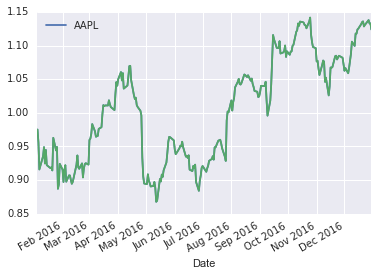

In [278]:
# Use this chance to pratice the learnt plotting skills

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
ret_index = (1+returns).cumprod()
ret_index.plot()
ret_index.plot().legend(['AAPL'], loc = 'best');

In [280]:
ret_index[0] = 1 # Set first value to 1
ret_index

Date
2016-01-04    1.000000
2016-01-05    0.974941
2016-01-06    0.955861
2016-01-07    0.915520
2016-01-08    0.920361
2016-01-11    0.935263
2016-01-12    0.948837
2016-01-13    0.924442
2016-01-14    0.944661
2016-01-15    0.921974
2016-01-19    0.917513
2016-01-20    0.918747
2016-01-21    0.914096
2016-01-22    0.962696
2016-01-25    0.943901
2016-01-26    0.949122
2016-01-27    0.886758
2016-01-28    0.893118
2016-01-29    0.923968
2016-02-01    0.915330
2016-02-02    0.896820
2016-02-03    0.914570
2016-02-04    0.921919
2016-02-05    0.897296
2016-02-08    0.906745
2016-02-09    0.906554
2016-02-10    0.899682
2016-02-11    0.894242
2016-02-12    0.897010
2016-02-16    0.922301
                ...   
2016-11-17    1.066885
2016-11-18    1.067952
2016-11-21    1.084157
2016-11-22    1.084836
2016-11-23    1.079305
2016-11-25    1.084739
2016-11-28    1.082604
2016-11-29    1.081537
2016-11-30    1.072416
2016-12-01    1.062421
2016-12-02    1.066400
2016-12-05    1.058734
2016-1

With a return index in hand, computing cumulative returns at a particular resolution
is simple:

In [283]:
m_returns = ret_index.resample('BM', how = 'last').pct_change()

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [284]:
m_returns['2016']

Date
2016-01-29         NaN
2016-02-29   -0.001287
2016-03-31    0.127211
2016-04-29   -0.139921
2016-05-31    0.071773
2016-06-30   -0.042660
2016-07-29    0.090063
2016-08-31    0.023652
2016-09-30    0.065504
2016-10-31    0.004334
2016-11-30   -0.021601
2016-12-30    0.047955
Freq: BM, Name: Adj Close, dtype: float64

Of course, in this simple case (no dividends or other adjustments to take into account)
these could have been computed from the daily percent changed by resampling with
aggregation (here, to periods):

In [285]:
m_rets = (1+returns).resample('M', how = 'prod', kind = 'period')-1

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).prod()
  if __name__ == '__main__':


In [286]:
m_rets['2016']

Date
2016-01   -0.076032
2016-02   -0.001287
2016-03    0.127211
2016-04   -0.139921
2016-05    0.071773
2016-06   -0.042660
2016-07    0.090063
2016-08    0.023652
2016-09    0.065504
2016-10    0.004334
2016-11   -0.021601
2016-12    0.047955
Freq: M, Name: Adj Close, dtype: float64

If you had dividend dates and percentages, including them in the total return per day
would look like:

In [287]:
returns[dividend_dates] += dividend_pcts

NameError: name 'dividend_dates' is not defined

## Group Transforms and Analysis - P340

In Chapter 9, you learned the basics of computing group statistics and applying your
own transformations to groups in a dataset.

Let’s consider a collection of hypothetical stock portfolios. I first randomly generate a
broad universe of 2000 tickers:

In [1]:
import random; random.seed(0)
import string

In [19]:
# In python 3, the xrange() in python 2 has been renamed to range()
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])

I then create a DataFrame containing 3 columns representing hypothetical, but random
portfolios for a subset of tickers:

In [20]:
M = 500
df = DataFrame({'Momentum': np.random.randn(M)/200+0.03,
              'Value': np.random.randn(M)/200+0.08,
              'ShortInterest': np.random.randn(M)/200-0.02},
              index = tickers[:M])

Next, let’s create a random industry classification for the tickers. To keep things simple,
I’ll just keep it to 2 industries, storing the mapping in a Series:

In [21]:
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = Series(ind_names[sampler], index = tickers,
                             name = 'industry')

Now we can group by industries and carry out group aggregation and transformations:

In [22]:
by_industry = df.groupby(industries)
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
FINANCIAL,0.030087,-0.020485,0.080022
TECH,0.028895,-0.019495,0.079145


In [9]:
by_industry.describe()

Momentum  ShortInterest       Value
industry                                              
FINANCIAL count  261.000000     261.000000  261.000000
          mean     0.029837      -0.020050    0.080343
          std      0.004875       0.005196    0.004886
          min      0.015933      -0.034071    0.066425
          25%      0.026512      -0.023198    0.077414
          50%      0.029642      -0.020146    0.080521
          75%      0.033153      -0.016477    0.083440
          max      0.043874      -0.007035    0.093309
TECH      count  239.000000     239.000000  239.000000
          mean     0.029996      -0.020005    0.079811
          std      0.005274       0.005299    0.005036
          min      0.016673      -0.035620    0.067494
          25%      0.026642      -0.023465    0.076702
          50%      0.029692      -0.020424    0.079654
          75%      0.033698      -0.016583    0.083279
          max      0.044293      -0.004935    0.095639

By defining transformation functions, it’s easy to transform these portfolios by industry.
For example, standardizing within industry is widely used in equity portfolio construction:

In [10]:
# Within-Industry Standardize
def zscore(group):
    return (group - group.mean()) / group.std()
df_stand = by_industry.apply(zscore)

You can verify that each industry has mean 0 and standard deviation 1:

In [11]:
# As can be noticed here there is little inaccuracy included. Those means are not exactly 0.
df_stand.groupby(industries).agg(['mean', 'std'])

Momentum      ShortInterest              Value     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  3.206460e-15  1.0 -5.618324e-15  1.0 -8.393137e-15  1.0
TECH       1.996645e-15  1.0  4.227209e-17  1.0 -1.544696e-14  1.0

Other, built-in kinds of transformations, like rank, can be used more concisely:

In [12]:
# Within-industry rank descending
ind_rank = by_industry.rank(ascending=False)

In [13]:
ind_rank.groupby(industries).agg(['min', 'max'])

Momentum        ShortInterest        Value       
               min    max           min    max   min    max
industry                                                   
FINANCIAL      1.0  261.0           1.0  261.0   1.0  261.0
TECH           1.0  239.0           1.0  239.0   1.0  239.0

In quantitative equity, “rank and standardize” is a common sequence of transforms.
You could do this by chaining together rank and zscore like so:

In [14]:
# Industry rank and standardize
by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,ShortInterest,Value
MYNBI,1.457177,1.708872,-0.397412
QPMZJ,1.489784,-0.173567,1.518712
PLSGQ,1.041402,-0.694268,0.520701
EJEYD,-1.536660,-0.172212,-0.755083
TZIRW,0.940542,0.437153,-1.549907
ZTEJD,1.229433,-1.605495,0.506237
XCVKP,1.359609,-0.433918,0.057856
RDLNK,-1.243897,-0.911227,0.332670
TUGRP,-0.649106,-1.152495,0.940542
OQIBZ,-0.039741,-0.821318,-0.198706


### Group Factor Exposures

Factor analysis is a technique in quantitative portfolio management. Portfolio holdings
and performance (profit and loss) are decomposed using one or more factors (risk factors
are one example) represented as a portfolio of weights. For example, a stock price’s
co-movement with a benchmark (like S&P 500 index) is known as its beta, a common
risk factor. Let’s consider a contrived example of a portfolio constructed from 3 randomly-
generated factors (usually called the factor loadings) and some weights:

In [4]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3,1000)
fac1, fac2, fac3

(array([  6.63217099e-01,   4.03263793e-01,   5.12059668e-02,
          1.02175648e-01,   3.28585167e-01,   3.77834351e-02,
          6.09814099e-01,   8.78562611e-01,   2.38841135e-01,
          3.54427155e-01,   7.06234254e-01,   3.10144477e-02,
          1.27893263e-01,   2.69234402e-01,   9.98965125e-01,
          8.26209452e-01,   4.74602088e-01,   1.38268372e-01,
          6.47720134e-01,   2.08491458e-01,   6.22088945e-01,
          8.77051049e-01,   4.79544908e-01,   1.69522860e-01,
          7.11242294e-01,   9.69407618e-01,   2.56530157e-01,
          8.48151454e-01,   5.90594376e-01,   4.99202226e-01,
          9.39697314e-01,   4.41834409e-01,   2.28312403e-01,
          5.14264179e-01,   4.75566466e-02,   9.62771591e-01,
          4.97992770e-01,   8.17438045e-01,   3.14057224e-01,
          4.48064014e-01,   2.68426278e-01,   6.24825049e-01,
          3.13028883e-01,   8.55244523e-02,   6.46443554e-01,
          1.41648376e-01,   9.03815674e-01,   7.29480261e-01,
        

In [5]:
# N = 1000
ticker_subset = tickers.take(np.random.permutation(N)[:1000])

# Weighted sum of factors plus noise
port = Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),
            index=ticker_subset)
factors = DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},
            index=ticker_subset)

NameError: name 'tickers' is not defined

In [6]:
#Take a look at what is what
ticker_subset

NameError: name 'ticker_subset' is not defined

In [35]:
port

IVDLC    0.333255
YZQQF    0.417635
WNRJP   -0.208926
BERKW    1.206563
QJDNX   -0.564075
ZQYSV   -0.447694
PQTNH   -0.017633
JSICX    0.527007
QLXMR    0.614312
USCJN   -0.179009
MNWKD    0.373825
HZSTB    1.122789
QDREK    0.240345
HLKVU   -0.235614
CGMKI   -0.458793
EUVTW    0.043129
RWQFY    1.024595
DCKNR   -0.031147
UAYRP    0.631263
UWMPK    0.522135
PRJLP    0.722728
KVBCG   -0.021142
PRCSG    0.088914
UAGFW    0.508223
INBWI    0.254302
SFYLE    0.820445
VCZCV    0.951262
CXDYW    0.597947
XIELZ    0.050033
ZUBGF    0.901971
           ...   
CFSFK    0.751840
ZPGHC   -0.259180
EKKCI    0.432015
QHIAQ    0.259688
STESW   -0.418880
JWJTI    1.196486
BYGBP    0.830683
KYYKP    0.048298
HANJT    0.881137
EIKND    0.862411
FLQWP    1.149276
AMDIG    0.643994
IQPJO   -0.515169
GPCKH    0.589572
XTXMG    0.224578
DXDVA    0.111311
TDJEM    0.865844
RHWLV    0.434405
DNKUH   -0.343262
ESDXY    0.633218
XLDSL   -0.246555
JJHFV   -0.130161
BBLFD    0.841259
YPJUJ    0.428770
BQVGR    0

In [36]:
factors

,f1,f2,f3
IVDLC,0.693717,0.434743,0.090772
YZQQF,0.963948,0.445519,0.679572
WNRJP,0.443490,0.866259,0.397596
BERKW,0.771003,0.176971,0.785395
QJDNX,0.701195,0.944323,0.182889
ZQYSV,0.062242,0.689633,0.324275
PQTNH,0.003968,0.636087,0.193623
JSICX,0.438825,0.617890,0.905173
QLXMR,0.169558,0.331312,0.666697
USCJN,0.727293,0.685951,0.044708


Vector correlations between each factor and the portfolio may not indicate too much:

In [37]:
factors.corrwith(port)

f1    0.393602
f2   -0.696525
f3    0.163246
dtype: float64

The standard way to compute the factor exposures is by least squares regression; using
pandas.ols with factors as the explanatory variables we can compute exposures over
the entire set of tickers:

In [38]:
pd.ols(y=port, x=factors).beta

C:\Users\Brad Sun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


f1           0.723370
f2          -1.213368
f3           0.287926
intercept    0.517561
dtype: float64

In [49]:
# Use the updated new version of code to generate the same result as above.
import statsmodels.api as sm

X = sm.add_constant(factors)
y = port

mod1 = sm.OLS(y, X)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     685.0
Date:                Tue, 17 Jan 2017   Prob (F-statistic):          1.55e-241
Time:                        09:54:06   Log-Likelihood:                -185.24
No. Observations:                1000   AIC:                             378.5
Df Residuals:                     996   BIC:                             398.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5176      0.030     17.471      0.0

In [51]:
res1.params

const    0.517561
f1       0.723370
f2      -1.213368
f3       0.287926
dtype: float64

As you can see, the original factor weights can nearly be recovered since there was not
too much additional random noise added to the portfolio. Using groupby you can compute
exposures industry by industry. To do so, write a function like so:

In [2]:
def beta_exposure(chunk, factors = None):
    return pd.ols(y=chunk, x=factors).beta

Then, group by industries and apply that function, passing the DataFrame of factor
loadings:

In [ ]:
by_ind = port.groupby(industries)

In [ ]:
exposures = by_ind.apply(beta_exposure, factors = factors)

In [ ]:
exposures.unstack()

### Decile and Quartile Analysis

Analyzing data based on sample quantiles is another important tool for financial analysts.
For example, the performance of a stock portfolio could be broken down into
quartiles (four equal-sized chunks) based on each stock’s price-to-earnings. Using pan
das.qcut combined with groupby makes quantile analysis reasonably straightforward.

As an example, let’s consider a simple trend following or momentum strategy trading
the S&P 500 index via the SPY exchange-traded fund. You can download the price
history from Yahoo! Finance:

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [5]:
data = wb.DataReader('spy', data_source = 'yahoo', start = datetime(2006,1,1))

In [6]:
data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,125.190002,127.000000,124.389999,126.699997,73256700,101.027353
2006-01-04,126.860001,127.489998,126.699997,127.300003,51899600,101.505782
2006-01-05,127.150002,127.589996,126.879997,127.379997,47307500,101.569568
2006-01-06,128.020004,128.580002,127.360001,128.440002,62885900,102.414789
2006-01-09,128.419998,129.059998,128.380005,128.770004,43527400,102.677924
2006-01-10,128.389999,128.979996,128.259995,128.899994,44960800,102.781574
2006-01-11,129.020004,129.440002,128.729996,129.309998,49598900,103.108501
2006-01-12,129.080002,129.279999,128.440002,128.800003,40509200,102.701844
2006-01-13,128.570007,128.899994,128.199997,128.679993,44856700,102.606151


Now, we’ll compute daily returns and a function for transforming the returns into a
trend signal formed from a lagged moving sum:

In [24]:
px = data['Adj Close']
returns = px.pct_change()

In [25]:
def to_index(rets):
    index = (1 + rets).cumprod() #index is accumulated returns 
    first_loc = max(index.notnull().argmax() - 1, 0) # first_loc is any value that is larger than 1
    index.values[first_loc] = 1 # set the index with the same value as first_loc as 1 
    return index # record this time's accumulated return i.e. 'index'
def trend_signal(rets, lookback, lag): 
    signal = pd.rolling_sum(rets, lookback, min_periods=lookback - 5) # set the signal as the past 5 days of 
    return signal.shift(lag)

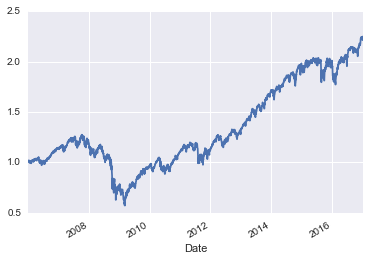

In [30]:
index = (1 + returns).cumprod()
index.plot()

In [37]:
# Signature: np.argmax(a, axis=None, out=None)
# Docstring:
# Returns the indices of the maximum values along an axis.
first_loc = max(index.notnull().argmax() - 1, 0)

ValueError: Cannot add integral value to Timestamp without freq.

In [45]:
 def fib(n): # write Fibonacci series up to n 
        
        a, b = 0, 1 
        while b < n: 
            print (b), 
            a, b = b, a+b
fib(3)

1
1
2


In [50]:
 def fib2(n): 
        result = [] 
        a, b = 0, 1 
        while b < n: 
            result.append(b) 
            a, b = b, a+b 
        return result
f100 = fib(100)

1
1
2
3
5
8
13
21
34
55
89


In [36]:
np.argmax?

Using this function, we can (naively) create and test a trading strategy that trades this
momentum signal every Friday:

In [21]:
signal = trend_signal(returns, 100, 3)

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,min_periods=95,center=False).sum()


In [22]:
signal

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-09         NaN
2006-01-10         NaN
2006-01-11         NaN
2006-01-12         NaN
2006-01-13         NaN
2006-01-17         NaN
2006-01-18         NaN
2006-01-19         NaN
2006-01-20         NaN
2006-01-23         NaN
2006-01-24         NaN
2006-01-25         NaN
2006-01-26         NaN
2006-01-27         NaN
2006-01-30         NaN
2006-01-31         NaN
2006-02-01         NaN
2006-02-02         NaN
2006-02-03         NaN
2006-02-06         NaN
2006-02-07         NaN
2006-02-08         NaN
2006-02-09         NaN
2006-02-10         NaN
2006-02-13         NaN
2006-02-14         NaN
                ...   
2016-11-23    0.062621
2016-11-25    0.056527
2016-11-28    0.056379
2016-11-29    0.064117
2016-11-30    0.061834
2016-12-01    0.057759
2016-12-02    0.044819
2016-12-05    0.038893
2016-12-06    0.027954
2016-12-07    0.028595
2016-12-08    0.029020
2016-12-09    0.033529
2016-1

In [20]:
#trend_signal(rets, lookback, lag)
signal = trend_signal(returns, 100, 3)
trade_friday = signal.resample('W-FRI').resample('B', fill_method='ffill')
trade_rets = trade_friday.shift(1) * returns
to_index(trade_rets).plot()
freq='5T'


time_index = pd.date_range(start=datetime(2013, 1, 1, 3),
                       end=datetime(2013, 1, 2, 2, 59),
                       freq='5T')
grid_columns = [u'in_brd', u'in_alt', u'out_brd', u'out_alt']  
grid_proto = pd.DataFrame(index=time_index, columns=grid_columns)

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,min_periods=95,center=False).sum()
C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  app.launch_new_instance()
C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  app.launch_new_instance()


ValueError: Cannot add integral value to Timestamp without freq.

In [18]:
trend_signal?

C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':
C:\Users\Brad Sun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


We can then convert the strategy returns to a return index and plot them (see Figure
11-1):

ValueError: Cannot add integral value to Timestamp without freq.

## More Example Applications

### Signal Frontier Analysis

### Future Contract Rolling

### Rolling Correlation and Linear Regression